<h1> CSMODEL Project 1 </h1>
<h2> Group 23</h2>
Members:
Lima, Alfonso Gabriel V.
Olalia, Pamela Kirsten G.
Ortega, A


## Netflix Original Films & IMDb Scores
The dataset of the notebook is called *Netflix Original Films & IMDB Scores*. It contains all of Netflix's produced films as of June 1, 2021. It contains basic information regarding each film such as the title, genre, language, runtime, and IMDb Score. 

The data in this dataset was acquired via webscraping of a [Wikipedia page](https://en.wikipedia.org/wiki/Lists_of_Netflix_original_films) by Nakul Lakhotia about Netflix's produced films over the years. The data was then integrated with its corresponding IMDb score manually by the owner of the dataset. The IMDb scores were aquired in their official website: [imdb.com](https://www.imdb.com/), which is the premiere website for movie reviews and critique.



## pandas, matplotlib and chardet
**pandas** is a software library for Python that is designed for data manipulation and data analysis. **matplotlib** is a software libary for data visualization, which allows us to easily render various types of graphs. We will be using these two libraries in this Notebook. **chardet** is a software library for Python that serves as the Universal Character Encoding Detector.

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
import scipy.stats

## Reading the dataset

In [196]:
with open('NetflixOriginals.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

In [197]:
netflix_df = pd.read_csv('NetflixOriginals.csv', encoding=result['encoding'])

## Structure of the Dataset

In [198]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


There are a total of 584 observations in the dataset. Each observation contains 6 variables to describe each observation. These are the records and details for every film by Netflix

In [199]:
netflix_df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


## Variables in the Dataset

The following are detailed descriptions of each column in the dataset: <br>
> 1. ***Title*** - The name of the film. This is the unique value of each observation in the dataset <br>
2. ***Genre*** - The type of film based on its narrative elements. This describes what kind of plot the film portrays. Some observations may have a mix of 2 or more genres. <br>
3. ***Premiere*** - The date when the film was released to the public.<br>
4. ***Runtime*** - The overall length of the film in minutes.<br>
5. ***IMDB Score*** - The score of the film on the IMDB website. The scores are taken from members of the IMDB community.
6. ***Language*** - The languages used in the film. Some films may have a mix of 2 or more languages

## Data Cleaning

#### Missing Values
The following code returns the number of null values which represents a missing value for each variable in the dataset.

In [200]:
netflix_df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

As seen above, there are no observations that contains a null value in any variable.

#### Data Type
The following code returns the data type of each variable in the dataset.

In [201]:
netflix_df.dtypes

Title          object
Genre          object
Premiere       object
Runtime         int64
IMDB Score    float64
Language       object
dtype: object

Almost all of the variables have the appropriate data type for their values except for the *Premiere*. Since the *Premiere* column contains the date of the premiere of the film, the appropriate data type for this is the **Datetime** data type not an object/string.

The following code will convert the data type to **Datetime**.

In [202]:
netflix_df["Premiere"] = pd.to_datetime(netflix_df['Premiere'])
netflix_df.dtypes

Title                 object
Genre                 object
Premiere      datetime64[ns]
Runtime                int64
IMDB Score           float64
Language              object
dtype: object

Now all of the variables in the dataset have the appropriate data type for their values.

#### Duplicate  Values
The values under the *Title* column are the only distinct values for each observation. This is because this is the only attribute that does not describe the observation but names it. So, to check if there are any duplicate values in the dataset, we must count how many unique values are under the *Title* column. If they are equal to the number of observations, then there are no duplicate observations.


In [203]:
netflix_df['Title'].nunique()

584

The code above returns the number of unique values under the *Title* column. It is equal to the number of observations, therefore, there are **no duplicate values in the dataset**

#### Data Format
Now we want to check if the data under the different columns are consistent with each other. The following blocks of code will display this.

In [204]:
netflix_df['Title'].unique()


array(['Enter the Anime', 'Dark Forces', 'The App', 'The Open House',
       'Kaali Khuhi', 'Drive', 'Leyla Everlasting',
       'The Last Days of American Crime', 'Paradox', 'Sardar Ka Grandson',
       'Searching for Sheela', 'The Call', 'Whipped',
       'All Because of You', 'Mercy', 'After the Raid', 'Ghost Stories',
       'The Last Thing He Wanted', 'What Happened to Mr. Cha?',
       'Death Note', "Hello Privilege. It's Me, Chelsea",
       'Secret Obsession', 'Sextuplets', 'The Girl on the Train',
       'Thunder Force', 'Fatal Affair', 'Just Say Yes',
       'Seriously Single', 'The Misadventures of Hedi and Cokeman',
       '5 Star Christmas', 'After Maria',
       'I Am the Pretty Thing That Lives in the House', 'Paris Is Us',
       'Porta dos Fundos: The First Temptation of Christ', 'Rattlesnake',
       'The Players', 'We Are One', 'Finding Agnes', 'IO', 'Sentinelle',
       'Sol Levante', 'The Binding', 'We Can Be Heroes',
       'Christmas Crossfire', 'Coin Heist', 'Mr

In [205]:
netflix_df['Genre'].unique()


array(['Documentary', 'Thriller', 'Science fiction/Drama',
       'Horror thriller', 'Mystery', 'Action', 'Comedy',
       'Heist film/Thriller', 'Musical/Western/Fantasy', 'Drama',
       'Romantic comedy', 'Action comedy', 'Horror anthology',
       'Political thriller', 'Superhero-Comedy', 'Horror',
       'Romance drama', 'Anime / Short', 'Superhero', 'Heist', 'Western',
       'Animation/Superhero', 'Family film', 'Action-thriller',
       'Teen comedy-drama', 'Romantic drama', 'Animation',
       'Aftershow / Interview', 'Christmas musical',
       'Science fiction adventure', 'Science fiction', 'Variety show',
       'Comedy-drama', 'Comedy/Fantasy/Family', 'Supernatural drama',
       'Action/Comedy', 'Action/Science fiction',
       'Romantic teenage drama', 'Comedy / Musical', 'Musical',
       'Science fiction/Mystery', 'Crime drama',
       'Psychological thriller drama', 'Adventure/Comedy', 'Black comedy',
       'Romance', 'Horror comedy', 'Christian musical',
       'Rom

For the *Genre* column, we can see that some multi-genre values are inconsistent with each other. Some have spaces before and after the "/" while others do not. This might cause difficulty later on in finding values so we want to change this to be having no space at all. <br> <br>
The following code will do that:


In [206]:
netflix_df["Genre"] = netflix_df["Genre"].str.replace(" / ","/")
netflix_df["Genre"].unique()

array(['Documentary', 'Thriller', 'Science fiction/Drama',
       'Horror thriller', 'Mystery', 'Action', 'Comedy',
       'Heist film/Thriller', 'Musical/Western/Fantasy', 'Drama',
       'Romantic comedy', 'Action comedy', 'Horror anthology',
       'Political thriller', 'Superhero-Comedy', 'Horror',
       'Romance drama', 'Anime/Short', 'Superhero', 'Heist', 'Western',
       'Animation/Superhero', 'Family film', 'Action-thriller',
       'Teen comedy-drama', 'Romantic drama', 'Animation',
       'Aftershow/Interview', 'Christmas musical',
       'Science fiction adventure', 'Science fiction', 'Variety show',
       'Comedy-drama', 'Comedy/Fantasy/Family', 'Supernatural drama',
       'Action/Comedy', 'Action/Science fiction',
       'Romantic teenage drama', 'Comedy/Musical', 'Musical',
       'Science fiction/Mystery', 'Crime drama',
       'Psychological thriller drama', 'Adventure/Comedy', 'Black comedy',
       'Romance', 'Horror comedy', 'Christian musical',
       'Romantic 

Another problem with the *Genre* column is that it has multiple representations of the same data, For example "Black comedy", "Satire" are both sub-genre of the Comedy Genre. We can just include them to be together. The following code will do that:

In [207]:
for i in range(len(netflix_df["Genre"])):
    if "comedy" in netflix_df["Genre"][i] or "-Comedy" in netflix_df["Genre"][i] or "Satire" in netflix_df["Genre"][i]:
        netflix_df["Genre"] = netflix_df["Genre"].replace({netflix_df["Genre"][i]: "Comedy"})
    if "drama" in netflix_df["Genre"][i]:
        netflix_df["Genre"] = netflix_df["Genre"].replace({netflix_df["Genre"][i]: "Drama"})
    if "thriller" in netflix_df["Genre"][i]:
        netflix_df["Genre"] = netflix_df["Genre"].replace({netflix_df["Genre"][i]: "Thriller"})
    if "horror" in netflix_df["Genre"][i] or "Horror anthology" in netflix_df["Genre"][i]:
        netflix_df["Genre"] = netflix_df["Genre"].replace({netflix_df["Genre"][i]: "Horror"})
    if "adventure" in netflix_df["Genre"][i]:
        netflix_df["Genre"] = netflix_df["Genre"].replace({netflix_df["Genre"][i]: "Adventure"})
    if "musical" in netflix_df["Genre"][i]:
        netflix_df["Genre"] = netflix_df["Genre"].replace({netflix_df["Genre"][i]: "Musical"})
    if "Family film" in netflix_df["Genre"][i]:
        netflix_df["Genre"] = netflix_df["Genre"].replace({netflix_df["Genre"][i]: "Family"})
    if "romance" in netflix_df["Genre"][i]:
        netflix_df["Genre"] = netflix_df["Genre"].replace({netflix_df["Genre"][i]: "Romance"})
    if "fantasy" in netflix_df["Genre"][i]:
        netflix_df["Genre"] = netflix_df["Genre"].replace({netflix_df["Genre"][i]: "Fantasy"})
    if "mystery" in netflix_df["Genre"][i]:
        netflix_df["Genre"] = netflix_df["Genre"].replace({netflix_df["Genre"][i]: "Mystery"})
    if "war" in netflix_df["Genre"][i]:
        netflix_df["Genre"] = netflix_df["Genre"].replace({netflix_df["Genre"][i]: "Action"})
netflix_df["Genre"].unique()

array(['Documentary', 'Thriller', 'Science fiction/Drama', 'Mystery',
       'Action', 'Comedy', 'Heist film/Thriller',
       'Musical/Western/Fantasy', 'Drama', 'Horror', 'Anime/Short',
       'Superhero', 'Heist', 'Western', 'Animation/Superhero', 'Family',
       'Animation', 'Aftershow/Interview', 'Musical', 'Adventure',
       'Science fiction', 'Variety show', 'Comedy/Fantasy/Family',
       'Action/Comedy', 'Action/Science fiction', 'Comedy/Musical',
       'Science fiction/Mystery', 'Adventure/Comedy', 'Romance', 'Biopic',
       'Science fiction/Thriller', 'Mockumentary', 'One-man show',
       'Comedy/Horror', 'Fantasy', 'Zombie/Heist', 'Sports film',
       'Stop Motion', 'Drama/Horror', 'War', 'Science fiction/Action',
       'Concert Film', 'Animation/Musical/Adventure',
       'Animation/Musicial', 'Animation/Comedy/Adventure',
       'Anime/Science fiction', 'Animation/Short', 'Drama/Short',
       'Anime/Fantasy', 'Variety Show', 'Superhero/Action',
       'Biographica

In [208]:
netflix_df["Premiere"].unique()

array(['2019-08-05T00:00:00.000000000', '2020-08-21T00:00:00.000000000',
       '2019-12-26T00:00:00.000000000', '2018-01-19T00:00:00.000000000',
       '2020-10-30T00:00:00.000000000', '2019-11-01T00:00:00.000000000',
       '2020-12-04T00:00:00.000000000', '2020-06-05T00:00:00.000000000',
       '2018-03-23T00:00:00.000000000', '2021-05-18T00:00:00.000000000',
       '2021-04-22T00:00:00.000000000', '2020-11-27T00:00:00.000000000',
       '2020-09-18T00:00:00.000000000', '2020-10-01T00:00:00.000000000',
       '2016-11-22T00:00:00.000000000', '2019-12-19T00:00:00.000000000',
       '2020-01-01T00:00:00.000000000', '2020-02-21T00:00:00.000000000',
       '2021-01-01T00:00:00.000000000', '2017-08-25T00:00:00.000000000',
       '2019-09-13T00:00:00.000000000', '2019-07-18T00:00:00.000000000',
       '2019-08-16T00:00:00.000000000', '2021-02-26T00:00:00.000000000',
       '2021-04-09T00:00:00.000000000', '2020-07-16T00:00:00.000000000',
       '2021-04-02T00:00:00.000000000', '2020-07-31

In [209]:
netflix_df["Runtime"].unique()

array([ 58,  81,  79,  94,  90, 147, 112, 149,  73, 139,  97, 101,  25,
       144, 115, 102, 100,  64,  99, 120, 105,  89, 107,  95,  37,  83,
        46,  85,  88,  86,  80,   4,  93, 106, 103, 119,  96, 113, 104,
        10,  98, 117,  70, 131,  87,  60, 116,  92, 121,  78, 114,  56,
        21,  63, 126, 142, 108, 125,  91,  49, 118,  34, 124,  52, 111,
        75, 148,  32,  23,  53, 132, 123, 122, 128,  82,  84,  42, 151,
        72,  30, 129,  44, 134, 109,  16,  41,  28,  74,   9, 155,  55,
        40,  17, 136, 130,  19,  54,  76,  39,   7,  57,  14,  31,  48,
        27,  45,  36,  47, 110, 138, 133, 140,  13,  11,  24,  15,  26,
       137,  71, 135,  12, 209,  51, 153], dtype=int64)

In [210]:
netflix_df["IMDB Score"].unique()

array([2.5, 2.6, 3.2, 3.4, 3.5, 3.7, 3.9, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6,
       4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9,
       6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2,
       7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5,
       8.6, 9. ])

In [211]:
netflix_df["Language"].unique()

array(['English/Japanese', 'Spanish', 'Italian', 'English', 'Hindi',
       'Turkish', 'Korean', 'Indonesian', 'Malay', 'Dutch', 'French',
       'English/Spanish', 'Portuguese', 'Filipino', 'German', 'Polish',
       'Norwegian', 'Marathi', 'Thai', 'Swedish', 'Japanese',
       'Spanish/Basque', 'Spanish/Catalan', 'English/Swedish',
       'English/Taiwanese/Mandarin', 'Thia/English', 'English/Mandarin',
       'Georgian', 'Bengali', 'Khmer/English/French', 'English/Hindi',
       'Tamil', 'Spanish/English', 'English/Korean', 'English/Arabic',
       'English/Russian', 'English/Akan', 'English/Ukranian/Russian'],
      dtype=object)

One of the values presented has a typo error. Instead of *"Thia/English"*, it should be *"Thai/English"*. The following code will correct this.

In [212]:
netflix_df["Language"] = netflix_df["Language"].str.replace("Thia/English","Thai/English")
netflix_df["Language"].unique()

array(['English/Japanese', 'Spanish', 'Italian', 'English', 'Hindi',
       'Turkish', 'Korean', 'Indonesian', 'Malay', 'Dutch', 'French',
       'English/Spanish', 'Portuguese', 'Filipino', 'German', 'Polish',
       'Norwegian', 'Marathi', 'Thai', 'Swedish', 'Japanese',
       'Spanish/Basque', 'Spanish/Catalan', 'English/Swedish',
       'English/Taiwanese/Mandarin', 'Thai/English', 'English/Mandarin',
       'Georgian', 'Bengali', 'Khmer/English/French', 'English/Hindi',
       'Tamil', 'Spanish/English', 'English/Korean', 'English/Arabic',
       'English/Russian', 'English/Akan', 'English/Ukranian/Russian'],
      dtype=object)

The data that contained *"Thia/English"* has now been converted to *"Thai/English"*

However, the languages could be divided into more columns as it would describe the languages present in the specific film better.

In [213]:
netflix_df[["Language1", "Language2", "Language3"]] = netflix_df['Language'].str.split("/",expand=True)
netflix_df.drop("Language",inplace=True,axis=1)
netflix_df

,Title,Genre,Premiere,Runtime,IMDB Score,Language1,Language2,Language3
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English,Japanese,None
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,None,None
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,None,None
3,The Open House,Thriller,2018-01-19,94,3.2,English,None,None
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,None,None
...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,None,None
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English,Ukranian,Russian
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,None,None
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,None,None


From the following blocks of code, only the *Genre* and *Language* columns had issues then was fixed. The rest of the data in other columns were consistent with each other.

## Exploratory Data Analysis

In [101]:
netflix_df.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


### Question 1: Which Language and Genre has the highest movie count?

Knowing what's the most common used Language in all the movies?
To answer this question, the variables of interest are:
- **`Language`**: Language used in the film.
- **`Genre`**: The genre type of the movie.
- **`IMDB Score`**: The IMDB Score rating of the movie.
- **`Runtime Length`**: The overall length of the film in minutes.

In [102]:
netflix_df["Language"]

0              English/Japanese
1                       Spanish
2                       Italian
3                       English
4                         Hindi
                 ...           
579                     English
580    English/Ukranian/Russian
581                     English
582                  Portuguese
583                     English
Name: Language, Length: 584, dtype: object

In [103]:
language_count_df = netflix_df['Language'].value_counts()
language_count_df

English                       401
Hindi                          33
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Korean                          6
Japanese                        6
English/Spanish                 5
German                          5
Turkish                         5
Polish                          3
Marathi                         3
Dutch                           3
English/Hindi                   2
English/Japanese                2
Filipino                        2
Thai                            2
English/Mandarin                2
English/Ukranian/Russian        1
Spanish/Basque                  1
Tamil                           1
English/Arabic                  1
Thai/English                    1
Khmer/English/French            1
English/Russian                 1
Swedish                         1
Spanish/Catalan                 1
English/Taiwan

Text(0.5, 1.0, 'Language Count in Movies')

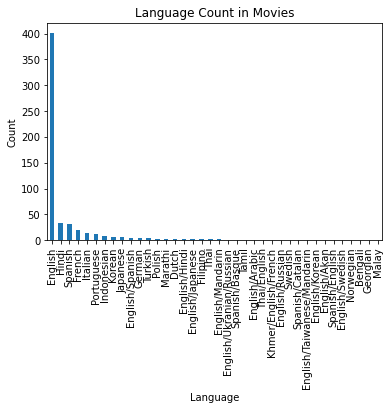

In [104]:
language_count_df.plot.bar()
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Language Count in Movies')

English has the largest number of usage in the movies in the dataframe.

In [105]:
genre_count_df = netflix_df['Genre'].value_counts()
genre_count_df

Documentary                             159
Drama                                   120
Comedy                                  115
Thriller                                 52
Horror                                   12
Biopic                                    9
Romance                                   7
Action                                    7
Aftershow/Interview                       6
Concert Film                              6
Musical                                   5
Animation                                 5
Variety show                              4
Animation/Short                           4
Family                                    4
Science fiction                           4
Adventure                                 4
Science fiction/Thriller                  4
Science fiction/Drama                     3
Western                                   3
Mystery                                   3
One-man show                              3
Fantasy                         

Text(0.5, 1.0, 'Genre Count')

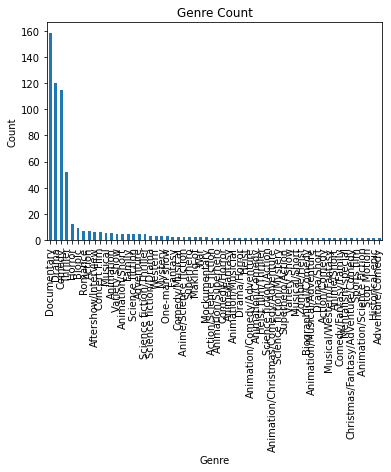

In [106]:
genre_count_df.plot.bar()
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Count')

The genre, Documentary, has the highest movie count. 

### Question 2: Which Genre and Language has the highest IMDB Score? Which Genre and Language have the longest and shortest runtime?

In [107]:
netflix_df["IMDB Score"]

0      2.5
1      2.6
2      2.6
3      3.2
4      3.4
      ... 
579    8.4
580    8.4
581    8.5
582    8.6
583    9.0
Name: IMDB Score, Length: 584, dtype: float64

In [108]:
netflix_df[["Language", "IMDB Score"]]

,Language,IMDB Score
0,English/Japanese,2.5
1,Spanish,2.6
2,Italian,2.6
3,English,3.2
4,Hindi,3.4
...,...,...
579,English,8.4
580,English/Ukranian/Russian,8.4
581,English,8.5
582,Portuguese,8.6


In [109]:
netflix_df[["Language", "Runtime"]]

,Language,Runtime
0,English/Japanese,58
1,Spanish,81
2,Italian,79
3,English,94
4,Hindi,90
...,...,...
579,English,125
580,English/Ukranian/Russian,91
581,English,153
582,Portuguese,89


#### Language and Runtime

In [110]:
meanLangRun_df = netflix_df.groupby("Language").agg({"Runtime":["mean","std"]})
meanLangRun_df.sort_values(("Runtime","mean"), ascending = False)

Runtime           
                                  mean        std
Language                                         
English/Akan                136.000000        NaN
Khmer/English/French        136.000000        NaN
Marathi                     121.666667   8.736895
English/Korean              121.000000        NaN
Spanish/Catalan             116.000000        NaN
Korean                      115.833333  22.631100
Hindi                       115.787879  16.999554
English/Arabic              114.000000        NaN
Indonesian                  103.777778  12.255384
Turkish                     101.800000  10.592450
Malay                       101.000000        NaN
Tamil                       101.000000        NaN
Thai                        101.000000  22.627417
Dutch                        99.666667   5.507571
German                       99.600000   9.396808
Filipino                     99.500000   7.778175
Japanese                     99.333333  48.272836
Polish                       98.666667   6.658328
Italian                      98.357143   9.328263
Spanish/English              96.000000        NaN
Spanish                      93.387097  24.556978
French                       92.700000  12.498842
English                      91.817955  28.506566
Portuguese                   91.250000  22.947073
English/Ukranian/Russian     91.000000        NaN
English/Taiwanese/Mandarin   91.000000        NaN
English/Russian              90.000000        NaN
English/Japanese             89.000000  43.840620
Spanish/Basque               89.000000        NaN
Swedish                      86.000000        NaN
Norwegian                    86.000000        NaN
Thai/English                 80.000000        NaN
English/Mandarin             59.000000  28.284271
Bengali                      41.000000        NaN
English/Swedish              40.000000        NaN
English/Spanish              39.200000  14.446453
English/Hindi                32.500000   9.192388
Georgian                     23.000000        NaN

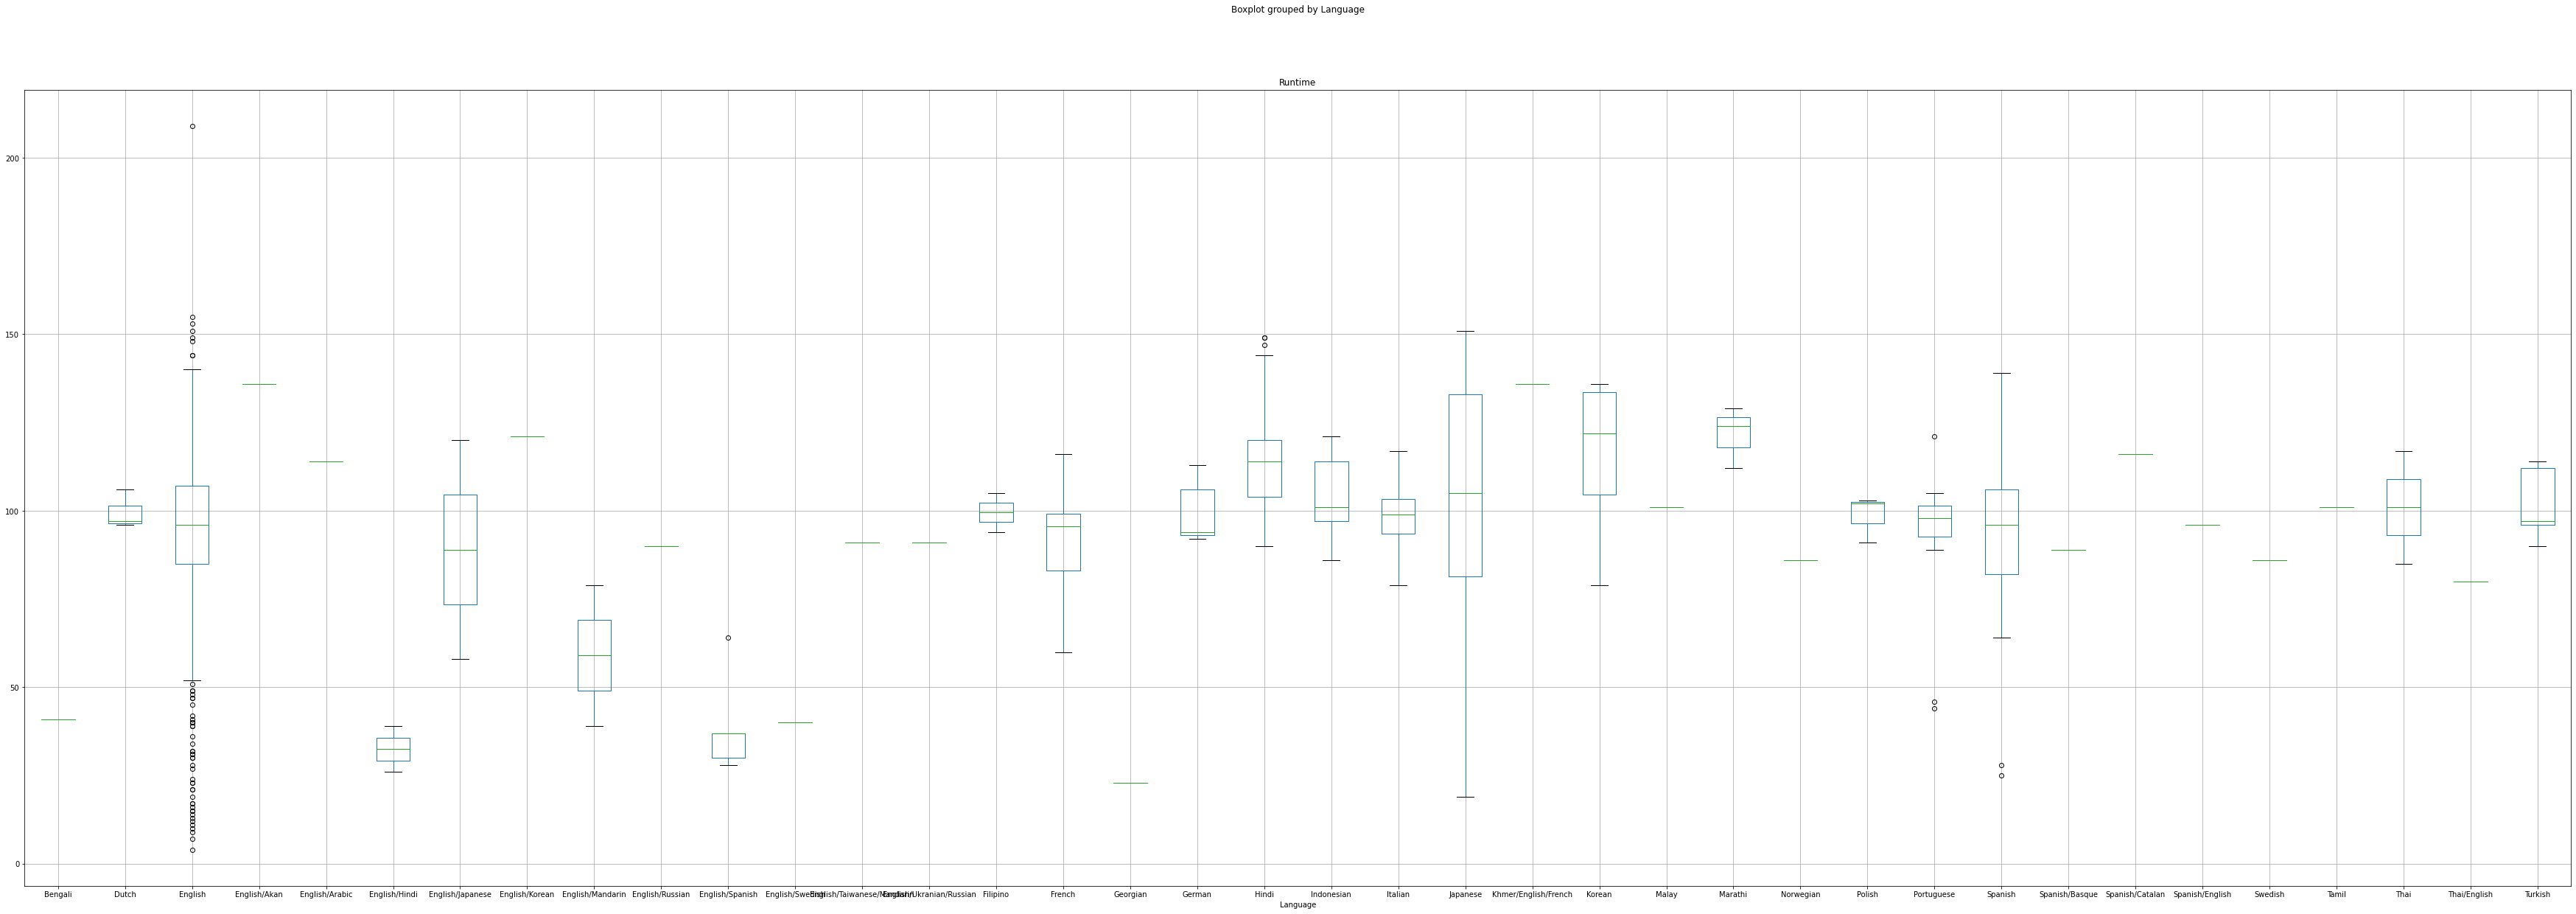

In [111]:
netflix_df.boxplot("Runtime", by="Language", figsize=(60,20))
plt.show()

The languages, English/Aka and Khmer/English/French, have the highest runtime length count with an average of 136 minutes. Meanwhile the Georgian language has the shortest runtime length count with an average time of of 23 minutes.

#### Language and IMDB Score

In [112]:
median_df = netflix_df.groupby("Language").agg({"IMDB Score": ["median", "std"]})
median_df.sort_values(("IMDB Score", "median"), ascending=False)

IMDB Score          
                               median       std
Language                                       
English/Ukranian/Russian         8.40       NaN
English/Akan                     7.70       NaN
English/Hindi                    7.30  0.141421
English/Russian                  7.30       NaN
Spanish/English                  7.30       NaN
English/Arabic                   7.30       NaN
English/Korean                   7.30       NaN
Khmer/English/French             7.20       NaN
Tamil                            7.20       NaN
Bengali                          7.10       NaN
English/Mandarin                 7.05  0.353553
Georgian                         6.80       NaN
Thai/English                     6.70       NaN
Japanese                         6.60  0.469042
English/Swedish                  6.50       NaN
English/Taiwanese/Mandarin       6.50       NaN
Spanish                          6.50  1.098631
Korean                           6.45  1.389124
English                          6.40  0.909423
Spanish/Catalan                  6.40       NaN
English/Spanish                  6.40  0.988433
Indonesian                       6.20  0.912567
Portuguese                       6.20  1.067566
Hindi                            6.10  1.118999
Turkish                          6.10  1.163185
French                           6.00  0.824046
Dutch                            5.80  1.300000
Marathi                          5.80  1.026320
German                           5.80  0.589915
Italian                          5.65  1.204935
Spanish/Basque                   5.60       NaN
Swedish                          5.50       NaN
Thai                             5.45  0.353553
Norwegian                        5.10       NaN
Filipino                         5.10  0.565685
Polish                           5.00  0.472582
English/Japanese                 4.40  2.687006
Malay                            4.20       NaN

In [113]:
mean_df = netflix_df.groupby("Language").agg({"IMDB Score":["mean","std"]})
mean_df.sort_values(("IMDB Score","mean"), ascending = False)

IMDB Score          
                                 mean       std
Language                                       
English/Ukranian/Russian     8.400000       NaN
English/Akan                 7.700000       NaN
English/Hindi                7.300000  0.141421
English/Arabic               7.300000       NaN
English/Korean               7.300000       NaN
English/Russian              7.300000       NaN
Spanish/English              7.300000       NaN
Khmer/English/French         7.200000       NaN
Tamil                        7.200000       NaN
Bengali                      7.100000       NaN
English/Mandarin             7.050000  0.353553
Georgian                     6.800000       NaN
Thai/English                 6.700000       NaN
English/Taiwanese/Mandarin   6.500000       NaN
English/Swedish              6.500000       NaN
Spanish/Catalan              6.400000       NaN
Japanese                     6.400000  0.469042
English                      6.380050  0.909423
Spanish                      6.303226  1.098631
English/Spanish              6.220000  0.988433
Portuguese                   6.216667  1.067566
Marathi                      6.066667  1.026320
Hindi                        5.981818  1.118999
Korean                       5.916667  1.389124
Indonesian                   5.844444  0.912567
Dutch                        5.800000  1.300000
French                       5.770000  0.824046
Turkish                      5.660000  1.163185
German                       5.640000  0.589915
Spanish/Basque               5.600000       NaN
Italian                      5.542857  1.204935
Swedish                      5.500000       NaN
Thai                         5.450000  0.353553
Polish                       5.166667  0.472582
Norwegian                    5.100000       NaN
Filipino                     5.100000  0.565685
English/Japanese             4.400000  2.687006
Malay                        4.200000       NaN

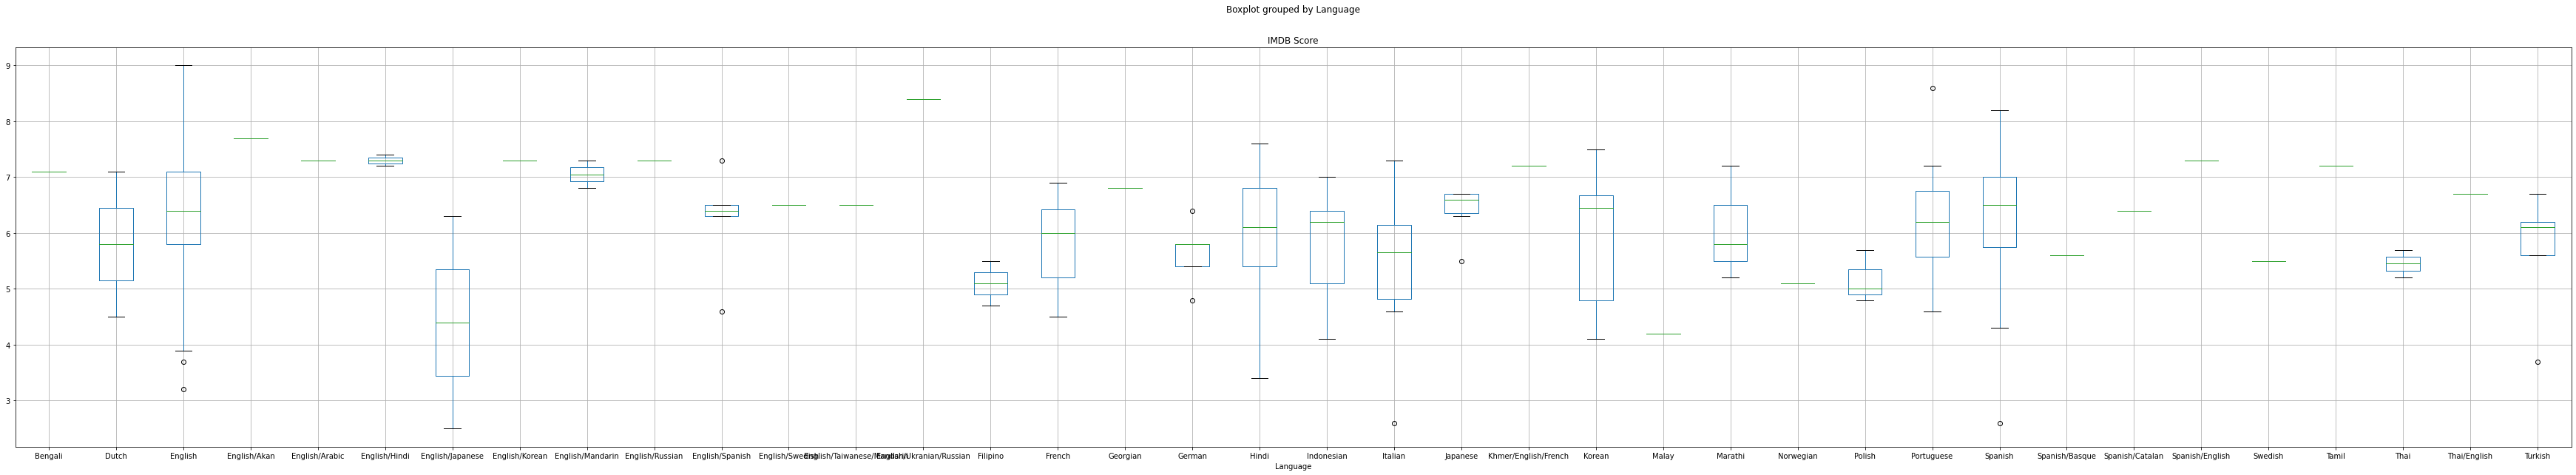

In [114]:
netflix_df.boxplot("IMDB Score", by="Language", figsize=(60,10))
plt.show()

The movies with English/Ukranian/Russian as its language has the the highest average IMDB score of 8.4 while the Malay movies scored the lowest average IMDB score of 4.2.

#### Comparing Language with IMDB Score and Language with Runtime Error


In [115]:
netflix_df.Genre.value_counts()

Documentary                             159
Drama                                   120
Comedy                                  115
Thriller                                 52
Horror                                   12
Biopic                                    9
Romance                                   7
Action                                    7
Aftershow/Interview                       6
Concert Film                              6
Musical                                   5
Animation                                 5
Variety show                              4
Animation/Short                           4
Family                                    4
Science fiction                           4
Adventure                                 4
Science fiction/Thriller                  4
Science fiction/Drama                     3
Western                                   3
Mystery                                   3
One-man show                              3
Fantasy                         

In [116]:
netflix_df[["Genre", "IMDB Score"]]

,Genre,IMDB Score
0,Documentary,2.5
1,Thriller,2.6
2,Science fiction/Drama,2.6
3,Thriller,3.2
4,Mystery,3.4
...,...,...
579,Concert Film,8.4
580,Documentary,8.4
581,One-man show,8.5
582,Documentary,8.6


In [117]:
netflix_df[["Genre", "Runtime"]]

,Genre,Runtime
0,Documentary,58
1,Thriller,81
2,Science fiction/Drama,79
3,Thriller,94
4,Mystery,90
...,...,...
579,Concert Film,125
580,Documentary,91
581,One-man show,153
582,Documentary,89


#### GENRE AND RUNTIME

In [118]:
meangenrun_df = netflix_df.groupby("Genre").agg({"Runtime":["mean","std"]})
meangenrun_df.sort_values(("Runtime","mean"), ascending = False)

Runtime           
                                            mean        std
Genre                                                      
Heist film/Thriller                   149.000000        NaN
Zombie/Heist                          148.000000        NaN
Science fiction/Mystery               126.000000        NaN
Superhero/Action                      124.000000        NaN
Historical-epic                       121.000000        NaN
Western                               116.666667  16.623277
Action/Science fiction                114.000000        NaN
Science fiction                       110.750000  21.061418
War                                   110.500000   3.535534
Musical                               109.200000  15.610894
Drama                                 108.508333  18.608752
Sports film                           108.000000        NaN
Science fiction/Action                108.000000        NaN
Action                                108.000000  26.312228
Biopic                                107.555556  13.258121
Thriller                              107.519231  16.508453
Fantasy                               106.500000  14.849242
Superhero                             106.500000   9.192388
Anime/Fantasy                         104.000000        NaN
Christmas/Fantasy/Adventure/Comedy    104.000000        NaN
Drama/Horror                          104.000000        NaN
Adventure                             103.000000  13.490738
Horror                                102.166667  17.251263
Comedy/Horror                         102.000000        NaN
Family                                101.500000  15.588457
Action/Comedy                         101.000000        NaN
Biographical/Comedy                   101.000000        NaN
Romance                                98.857143  13.082158
Concert Film                           98.666667  15.370968
One-man show                           98.666667  50.934599
Comedy                                 98.634783  14.879239
Comedy/Fantasy/Family                  98.000000        NaN
Mystery                                98.000000   8.544004
Animation/Christmas/Comedy/Adventure   97.000000        NaN
Heist                                  97.000000        NaN
Animation/Musical/Adventure            95.000000        NaN
Science fiction/Thriller               92.500000   4.203173
Science fiction/Drama                  92.000000  11.789826
Animation/Comedy/Adventure             90.000000        NaN
Anime/Science fiction                  90.000000  22.627417
Animation/Superhero                    89.000000        NaN
Adventure/Comedy                       83.000000        NaN
Documentary                            78.962264  29.064286
Musical/Western/Fantasy                73.000000        NaN
Animation/Science Fiction              71.000000        NaN
Mockumentary                           63.500000  44.547727
Variety show                           60.500000   8.736895
Animation                              57.200000  23.679105
Variety Show                           54.000000        NaN
Mentalism special                      49.000000        NaN
Animation/Comedy                       45.000000        NaN
Comedy/Musical                         43.000000  18.384776
Making-of                              42.500000  41.719300
Stop Motion                            42.000000        NaN
Animation/Musicial                     41.000000        NaN
Aftershow/Interview                    23.666667  10.053192
Drama/Short                            17.000000        NaN
Musical/Short                          15.000000        NaN
Animation/Short                        10.750000   3.500000
Anime/Short                             4.000000        NaN

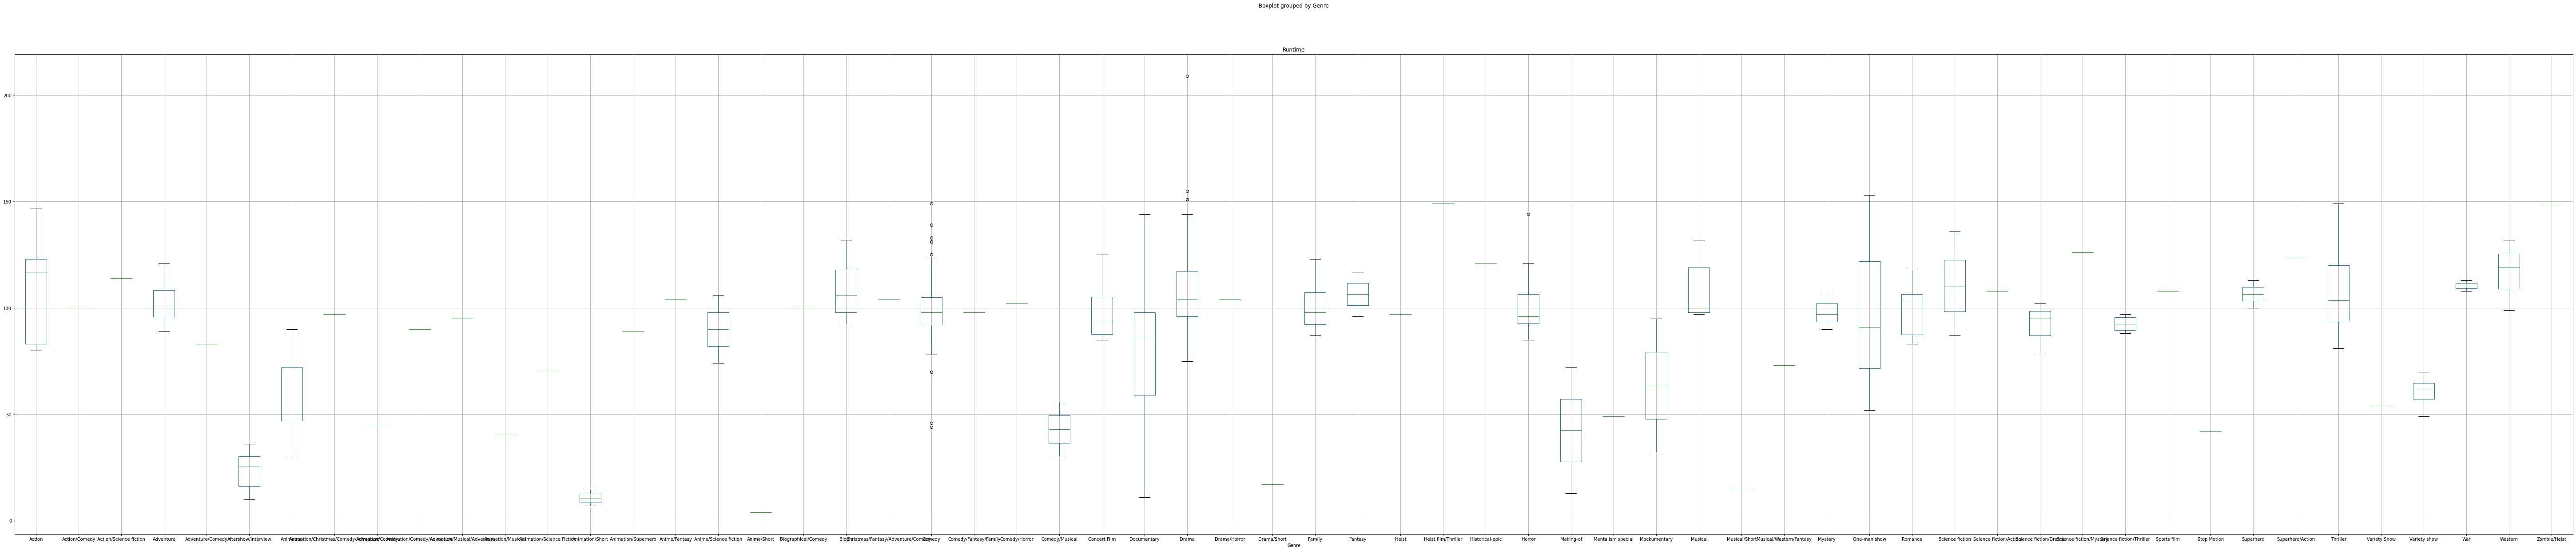

In [119]:
netflix_df.boxplot("Runtime", by="Genre", figsize=(100,20))
plt.show()

The **Heist film/Thriller** genre had the highest average runtime length with 149 minutes and the Anime/Short genre had the lowest mean runtime length of 4 minutes. 

#### GENRE AND IMDB SCORE


In [120]:
meangenscore_df = netflix_df.groupby("Genre").agg({"IMDB Score":["mean","std"]})
meangenscore_df.sort_values(("IMDB Score","mean"), ascending = False)

IMDB Score          
                                           mean       std
Genre                                                    
Animation/Christmas/Comedy/Adventure   8.200000       NaN
Musical/Short                          7.700000       NaN
Concert Film                           7.633333  0.744759
Animation/Science Fiction              7.500000       NaN
Making-of                              7.450000  0.353553
One-man show                           7.133333  1.350309
Animation/Short                        7.125000  0.556028
Mentalism special                      7.100000       NaN
Christmas/Fantasy/Adventure/Comedy     7.000000       NaN
Animation/Comedy                       7.000000       NaN
Documentary                            6.936478  0.843172
Historical-epic                        6.900000       NaN
Biographical/Comedy                    6.800000       NaN
War                                    6.750000  0.636396
Aftershow/Interview                    6.750000  0.784219
Anime/Fantasy                          6.700000       NaN
Variety Show                           6.700000       NaN
Superhero/Action                       6.700000       NaN
Anime/Science fiction                  6.600000  0.141421
Animation                              6.560000  0.920869
Drama/Short                            6.500000       NaN
Romance                                6.442857  0.461364
Animation/Musical/Adventure            6.400000       NaN
Animation/Comedy/Adventure             6.400000       NaN
Animation/Musicial                     6.400000       NaN
Biopic                                 6.400000  0.524404
Drama                                  6.318333  0.749115
Drama/Horror                           6.300000       NaN
Science fiction/Action                 6.300000       NaN
Adventure                              6.275000  0.873212
Comedy/Musical                         6.200000  0.989949
Stop Motion                            6.200000       NaN
Western                                6.066667  1.250333
Fantasy                                6.050000  0.353553
Science fiction/Thriller               6.000000  0.282843
Variety show                           5.950000  1.047219
Sports film                            5.900000       NaN
Zombie/Heist                           5.900000       NaN
Mockumentary                           5.850000  0.070711
Comedy/Horror                          5.800000       NaN
Musical                                5.760000  0.487852
Family                                 5.750000  0.619139
Comedy                                 5.728696  0.747483
Science fiction                        5.725000  0.607591
Thriller                               5.715385  0.975260
Adventure/Comedy                       5.500000       NaN
Science fiction/Mystery                5.500000       NaN
Action                                 5.414286  1.112697
Action/Comedy                          5.400000       NaN
Action/Science fiction                 5.400000       NaN
Comedy/Fantasy/Family                  5.400000       NaN
Superhero                              5.350000  0.919239
Horror                                 5.266667  0.649942
Mystery                                5.100000  1.473092
Animation/Superhero                    4.900000       NaN
Heist                                  4.800000       NaN
Anime/Short                            4.700000       NaN
Science fiction/Drama                  4.533333  1.855622
Musical/Western/Fantasy                3.900000       NaN
Heist film/Thriller                    3.700000       NaN

In [121]:
median_df = netflix_df.groupby("Genre").agg({"IMDB Score": ["median", "std"]})
median_df.sort_values(("IMDB Score", "median"), ascending=False)

IMDB Score          
                                         median       std
Genre                                                    
Animation/Christmas/Comedy/Adventure       8.20       NaN
Musical/Short                              7.70       NaN
Concert Film                               7.60  0.744759
Animation/Science Fiction                  7.50       NaN
Making-of                                  7.45  0.353553
Animation/Short                            7.10  0.556028
Mentalism special                          7.10       NaN
Animation                                  7.10  0.920869
One-man show                               7.10  1.350309
Animation/Comedy                           7.00       NaN
Documentary                                7.00  0.843172
Aftershow/Interview                        7.00  0.784219
Christmas/Fantasy/Adventure/Comedy         7.00       NaN
Historical-epic                            6.90       NaN
Biographical/Comedy                        6.80       NaN
War                                        6.75  0.636396
Superhero/Action                           6.70       NaN
Variety Show                               6.70       NaN
Anime/Fantasy                              6.70       NaN
Anime/Science fiction                      6.60  0.141421
Drama/Short                                6.50       NaN
Romance                                    6.50  0.461364
Animation/Musicial                         6.40       NaN
Animation/Musical/Adventure                6.40       NaN
Animation/Comedy/Adventure                 6.40       NaN
Drama                                      6.30  0.749115
Drama/Horror                               6.30       NaN
Adventure                                  6.30  0.873212
Science fiction/Action                     6.30       NaN
Stop Motion                                6.20       NaN
Comedy/Musical                             6.20  0.989949
Biopic                                     6.20  0.524404
Western                                    6.10  1.250333
Fantasy                                    6.05  0.353553
Family                                     5.90  0.619139
Science fiction/Thriller                   5.90  0.282843
Sports film                                5.90       NaN
Thriller                                   5.90  0.975260
Mystery                                    5.90  1.473092
Zombie/Heist                               5.90       NaN
Mockumentary                               5.85  0.070711
Comedy/Horror                              5.80       NaN
Comedy                                     5.80  0.747483
Musical                                    5.70  0.487852
Action                                     5.70  1.112697
Science fiction                            5.55  0.607591
Variety show                               5.55  1.047219
Science fiction/Mystery                    5.50       NaN
Adventure/Comedy                           5.50       NaN
Action/Comedy                              5.40       NaN
Comedy/Fantasy/Family                      5.40       NaN
Action/Science fiction                     5.40       NaN
Superhero                                  5.35  0.919239
Horror                                     5.25  0.649942
Animation/Superhero                        4.90       NaN
Heist                                      4.80       NaN
Science fiction/Drama                      4.70  1.855622
Anime/Short                                4.70       NaN
Musical/Western/Fantasy                    3.90       NaN
Heist film/Thriller                        3.70       NaN

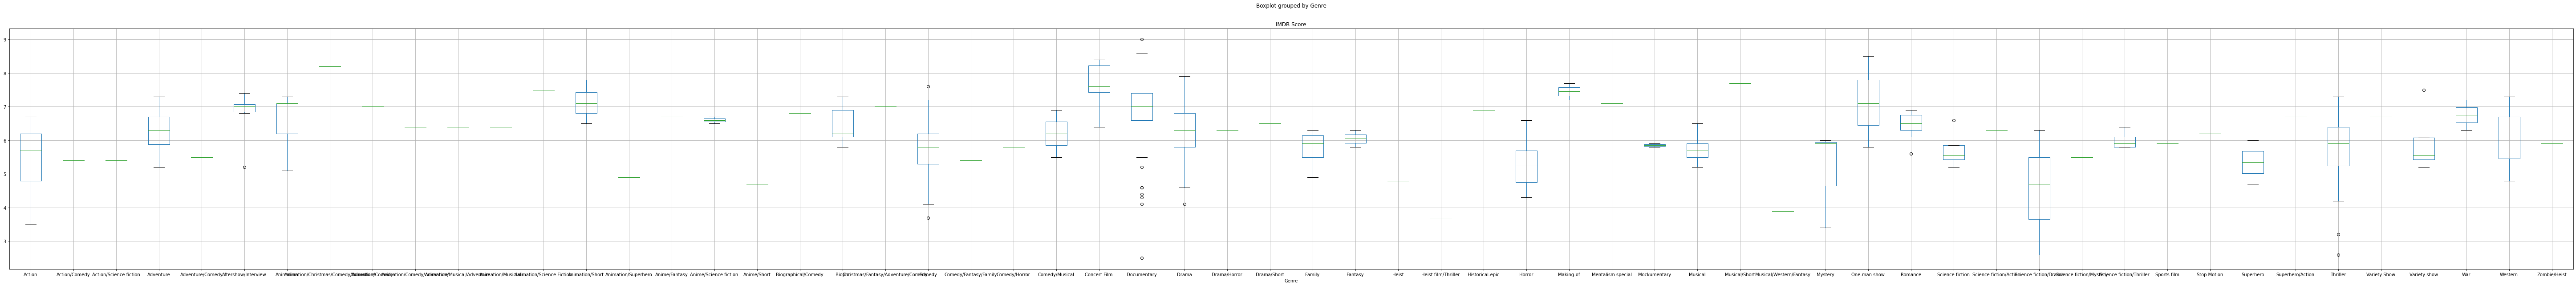

In [122]:
netflix_df.boxplot("IMDB Score", by="Genre", figsize=(100,10))
plt.show()

The Animation/Christmas/Comedy/Adventure genre had the highest average IMDB score rate of 8.2 and the Heist film/Thriller genre scored the lowest average IMDB score of 3.7.

<h1> Statistical Inference </h1>

<h3>Research Questions </h3>

- <b>Is there association between the Languages of a Netflix original and IMDB Score?</b><br>

    - Language is our way of communicating to each other, and there are a lot of languages in the entire world. And of course there are also a lot of movies with different languages. Knowing if languages have effect on IMDB scores will know if there are certain languages that is appealing more to critics and the audience or not. <br><br>
    
- <b>Is there a difference in IMDB Scores between Netflix Originals released before before 2020?</b><br>
    
    - Before 2019 ended, there was a virus detected in Wuhan China, and later on will spread around the world and will be known as "COVID-19". In 2020, countries have closed its borders to prevent the virus from spreading and our society has collapsed ever since. With the strict protocols in preventing the virus from spreading, there were certain industries that had a hard time keeping up with society. One of those is the entertainment industry. In the year 2020, it became very hard to create movies and other entertainment shows as they have to decrease the number of people in a location, follow social distancing protocols, and changing of plans since some locations are closed to the public. Knowing the difficulties the entertainment industry have faced throughout this pandemic, did Netflix Originals became better or worse because of the pandemic?

<h2> Research Question 1: Is there a difference in IMDB Scores between Netflix Originals released before 2020 and Netflix Originals that were created 2020 onwards? </h2>

<b>H0</b> : There is no difference in the average IMDB Scores of Netflix originals released before 2020 and 2020 onwards<br>
<b>H1</b> : There is a difference in the average IMDB Scores of Netflix originals released before 2020 and 2020 onwards <br>

95% Confidence interval

Before starting, we have to check if IMDB Scores are normally distributed

<AxesSubplot:xlabel='IMDB Score', ylabel='Count'>

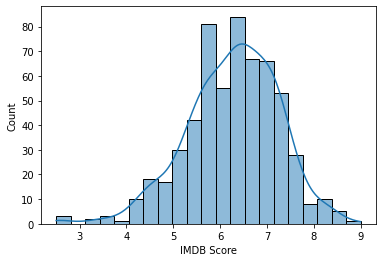

In [214]:
sns.histplot(data = netflix_df, x = "IMDB Score", kde = True)

As shown in the graph, The IMDB scores of Netflix Originals are normally distributed, having the majority somewhere between 6 - 7.

Before we start, we first create a copy of the dataset

In [215]:
temp_df = netflix_df.copy()
temp_df

,Title,Genre,Premiere,Runtime,IMDB Score,Language1,Language2,Language3
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English,Japanese,None
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,None,None
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,None,None
3,The Open House,Thriller,2018-01-19,94,3.2,English,None,None
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,None,None
...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,None,None
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English,Ukranian,Russian
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,None,None
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,None,None


Two dataframes will be created, one for Netflix Originals that are premiered before 2020 and 2020 onwards. After creating the two dataframes, the mean and standard deviation of the IMDB scores will be computed using the agg function 

In [216]:
#b20_df - below 2020
#a20_df - above 2020

b20_df = temp_df[(temp_df['Premiere'] > '2013') & (temp_df['Premiere'] < '2020')]
a20_df = temp_df[temp_df['Premiere'] >= '2020']

a20_n = len(a20_df)
b20_n = len(b20_df)

a20_agg = a20_df.agg({"IMDB Score": ["mean", "std"]})
b20_agg = b20_df.agg({"IMDB Score": ["mean", "std"]})

print(b20_agg)
print(a20_agg)

      IMDB Score
mean    6.362727
std     0.954642
      IMDB Score
mean    6.153543
std     0.999905


After getting the mean and standard deviation of the two groups. It is time to compute for the standard error, degrees of freedom and t-statistic to be able to compute for the p-value

In [217]:
#compute for standard error
a20_se = a20_agg.loc["std"][0]/np.sqrt(a20_n)
b20_se = b20_agg.loc["std"][0]/np.sqrt(b20_n)

print('Standard Error of a20 : {:.4f}'.format(a20_se))
print('Standard Error of b20 : {:.4f}'.format(b20_se))

sed = np.sqrt((a20_se**2.0) + (b20_se**2.0))
print('SED : {:.4f}'.format(sed))

Standard Error of a20 : 0.0627
Standard Error of b20 : 0.0526
SED : 0.0818


In [218]:
#compute for t statistic
t_stat = (b20_agg.loc["mean"][0] - a20_agg.loc["mean"][0]) / sed

df = a20_n + b20_n - 2

print('t-statistics : {:.4f}'.format(t_stat))
print('degrees of freedom : {:.4f}'.format(df))

t-statistics : 2.5560
degrees of freedom : 582.0000


In [219]:
#now compute the p-value

#significance level
a = 0.05

#get critical value
critical_value = scipy.stats.t.ppf(1.0 - a, df)

#get 
researchQ1_p = (1 - scipy.stats.t.cdf(abs(t_stat), df)) * 2

print('p-value : {:4f}'.format(researchQ1_p))

p-value : 0.010842


<h2> Research Question 2: Is there association between the Available Languages of a Netflix original and IMDB Score? </h2>

<b>H0</b> : The IMDB Score range has no association with the Language availble of a Netflix Original <br>
<b>H1</b> : The IMDB score has association with the Language avaible of a Netflix Original <br>

95% Confidence interval

As seen in Research Question 1, the IMDB scores of Netflix Originals are normally distributed

<h3> Legend: </h3><br>
<b>High</b> : score >= 7.0 <br>
<b>low</b>  : score < 7.0 <br>

According to IMDB, the average score of all films is 7.0. Therefore, we will use 7.0 as our guideline to determine what makes a Netflix original have a good or bad IMDB Score.

Before starting, Data preprocessing must be done before computing the p-value. <br>

We first apply the scoring to the dataset by creating a copy. Then apply the "score" algorithm to determine what category is the IMDB Score of the Netflix Original

In [220]:
#apply high or low score
def score (score):
    if score >= 7.0:
        return "High"
    elif score < 7.0:
        return "Low"
    
netflix_copy = netflix_df.copy()
netflix_copy["IMDB Score Type"] = netflix_copy["IMDB Score"].apply(score)
netflix_copy

,Title,Genre,Premiere,Runtime,IMDB Score,Language1,Language2,Language3,IMDB Score Type
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English,Japanese,None,Low
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,None,None,Low
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,None,None,Low
3,The Open House,Thriller,2018-01-19,94,3.2,English,None,None,Low
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,None,None,Low
...,...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,None,None,High
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English,Ukranian,Russian,High
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,None,None,High
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,None,None,High


We now group the Languages. We will only choose the languages that have at least a sample size of 5. But before we do that, we have to check the count of the Netflix Originals with Multilpe Languages.

In [221]:
count1 = netflix_copy['Language1'].value_counts()
count2 = netflix_copy['Language2'].value_counts()
count3 = netflix_copy['Language3'].value_counts()

In [222]:
#use this to check values of all counts
count1
#count2
#count3

English       419
Spanish        34
Hindi          33
French         20
Italian        14
Portuguese     12
Indonesian      9
Korean          6
Japanese        6
German          5
Turkish         5
Polish          3
Thai            3
Dutch           3
Marathi         3
Filipino        2
Malay           1
Swedish         1
Norwegian       1
Khmer           1
Georgian        1
Tamil           1
Bengali         1
Name: Language1, dtype: int64

In [223]:
count1 = count1.add(count2, fill_value = 0)
total = count1.add(count3, fill_value = 0)
total.sort_values(ascending = False)

English       422.0
Spanish        39.0
Hindi          35.0
French         21.0
Italian        14.0
Portuguese     12.0
Indonesian      9.0
Japanese        8.0
Korean          7.0
German          5.0
Turkish         5.0
Mandarin        3.0
Thai            3.0
Dutch           3.0
Polish          3.0
Marathi         3.0
Filipino        2.0
Russian         2.0
Swedish         2.0
Catalan         1.0
Bengali         1.0
Basque          1.0
Arabic          1.0
Ukranian        1.0
Khmer           1.0
Georgian        1.0
Malay           1.0
Norwegian       1.0
Taiwanese       1.0
Tamil           1.0
Akan            1.0
dtype: float64

Now that we got all the languages separated. We now check the count for each. After getting and checking the counts. We add the three

The Netflix Originals now must be grouped according to the available languages. Netflix Originals with more than two languages will be in 2 or more groups.

Seen in the table above, The languages, English, Hindi, Spanish, French, Italian, Portuguese, Indonesian, Japanese and Korean, German and Turkish are the only languages that have at least 5 netflix originals. <br>

We will now only take the Netflix Originals with languages that have the chosen languages.

In [224]:
def removeLanguage(l):
    arr = ['English', 'Hindi', 'Spanish', 'French', 'Italian', 'Portuguese', 'Indonesian','Japanese', 'Korean', 'German', "Turkish"]
    if l in arr:
        return l
    
    return None
    

temp_Language = ['English', 'Hindi', 'Spanish', 'French', 'Italian', 'Portuguese', 'Indonesian','Japanese', 'Korean', 'German', "Turkish"]
temp1_df = netflix_copy[netflix_copy['Language1'].isin(temp_Language)]
temp2_df = netflix_copy[netflix_copy['Language2'].isin(temp_Language)]
temp3_df = netflix_copy[netflix_copy['Language3'].isin(temp_Language)]


researchQ2_df = pd.concat([temp1_df, temp2_df, temp3_df]).drop_duplicates()

#remove languages not in chosen languages.
researchQ2_df['Language1'] = researchQ2_df['Language1'].apply(removeLanguage)
researchQ2_df['Language2'] = researchQ2_df['Language2'].apply(removeLanguage)
researchQ2_df['Language3'] = researchQ2_df['Language3'].apply(removeLanguage)
researchQ2_df

,Title,Genre,Premiere,Runtime,IMDB Score,Language1,Language2,Language3,IMDB Score Type
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English,Japanese,None,Low
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,None,None,Low
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,None,None,Low
3,The Open House,Thriller,2018-01-19,94,3.2,English,None,None,Low
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,None,None,Low
...,...,...,...,...,...,...,...,...,...
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,None,None,High
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,None,None,High
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English,None,None,High
375,Hope Frozen: A Quest to Live Twice,Documentary,2020-09-15,80,6.7,None,English,None,Low


Here is a table to see how many Netflix Originals have a high and low IMDB Score per Language.

In [225]:
temp1_table = pd.crosstab(researchQ2_df["Language1"], researchQ2_df["IMDB Score Type"])
temp2_table = pd.crosstab(researchQ2_df["Language2"], researchQ2_df["IMDB Score Type"])
temp3_table = pd.crosstab(researchQ2_df["Language3"], researchQ2_df["IMDB Score Type"])

vals = ["Language", "High", "Low"]
vals1 = ["Language", "High"]

temp1_table = temp1_table.reset_index().set_index('Language1', drop = False)
temp2_table = temp2_table.reset_index().set_index('Language2', drop = False)
temp3_table = temp3_table.reset_index().set_index('Language3', drop = False)

temp1_table.columns = vals
temp2_table.columns = vals
temp3_table.columns = vals1

researchQ2_table =  pd.concat([temp1_table, temp2_table, temp3_table])
researchQ2_table = researchQ2_table.groupby("Language", sort = False).sum()
researchQ2_table

,High,Low
Language,,
English,128,294.0
French,1,20.0
German,0,5.0
Hindi,7,28.0
Indonesian,1,8.0
Italian,2,12.0
Japanese,0,8.0
Korean,2,5.0
Portuguese,2,10.0


After processing all the data that we need, it is now time to solve for the p-value. The Test used to answer this research question is <b> Chi-Square test </b>.

Also after checking dataset, all of the observations are independent, and the groups have a sample size of atleast 5.

In [226]:
researchQ2_chi = scipy.stats.chi2_contingency(researchQ2_table, correction = True)
print('p-value : {:.4f}'.format(researchQ2_chi[1]))

p-value : 0.0506
